# El objetivo de este cuaderno es demostrar cómo se podrían emplear tanto el análisis de datos como el aprendizaje automático para generar información valiosa que ayude a la empresa a mejorar sus servicios y la experiencia del cliente. Aunque estos análisis y conclusiones se basan en datos ficticios, el proceso y las técnicas utilizadas podrían aplicarse a datos reales de la empresa de telecomunicaciones.

## Creando el Dataframe con datos ficticios, importacion de librerias necesarias para ejecutar el codigo

In [17]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans

# Número de filas
n = 2000

# Crear datos ficticios
data = {
    "ID": np.arange(1, n + 1),
    "Barrio": [random.choice(["Palermo", "Belgrano", "Recoleta", "San Telmo", "Villa Crespo"]) for _ in range(n)],
    "Latitud": np.random.uniform(-34.7, -34.5, n),
    "Longitud": np.random.uniform(-58.5, -58.3, n),
    "Hora_del_día": [f"{random.randint(0, 23)}:{random.randint(0, 59)}" for _ in range(n)],
    "Tipo_de_dispositivo": [random.choice(["Smartphone", "Tablet", "Laptop"]) for _ in range(n)],
    "Calidad_de_señal": np.random.randint(1, 6, n),
    "Velocidad_de_internet": np.random.randint(5, 51, n),
    "Volumen_de_llamadas": np.random.randint(0, 101, n),
    "Volumen_de_mensajes": np.random.randint(0, 101, n),
    "Tiempo_medio_de_llamada": np.random.randint(1, 61, n),
    "Red": [random.choice(["2G", "3G", "4G", "5G"]) for _ in range(n)],
    "Antigüedad_del_dispositivo": np.random.uniform(0, 5, n),
    "Sistema_operativo": [random.choice(["Android", "iOS"]) for _ in range(n)],
    "Plan_tarifario": [random.choice(["Prepago", "Pos-pago", "Ilimitado"]) for _ in range(n)],
    "Satisfacción_del_cliente": np.random.randint(1, 6, n),
}

# Crear un DataFrame de pandas
df = pd.DataFrame(data)

# Mostrar las primeras 10 filas del DataFrame
df.head(10)


,ID,Barrio,Latitud,Longitud,Hora_del_día,Tipo_de_dispositivo,Calidad_de_señal,Velocidad_de_internet,Volumen_de_llamadas,Volumen_de_mensajes,Tiempo_medio_de_llamada,Red,Antigüedad_del_dispositivo,Sistema_operativo,Plan_tarifario,Satisfacción_del_cliente
0,1,Recoleta,-34.616091,-58.418999,21:5,Tablet,5,49,7,76,17,3G,2.500298,Android,Ilimitado,3
1,2,Palermo,-34.560434,-58.323497,1:45,Smartphone,5,36,90,30,5,4G,4.147656,Android,Pos-pago,4
2,3,Palermo,-34.625035,-58.351448,0:27,Laptop,2,37,82,10,42,4G,3.185340,iOS,Prepago,1
3,4,Recoleta,-34.509797,-58.357289,4:8,Tablet,4,22,40,90,11,5G,1.123506,Android,Pos-pago,5
4,5,Recoleta,-34.614864,-58.371056,4:20,Smartphone,5,35,50,81,18,5G,2.717741,iOS,Pos-pago,2
5,6,Villa Crespo,-34.632862,-58.404603,22:27,Laptop,4,48,79,44,9,2G,0.293745,Android,Pos-pago,3
6,7,Palermo,-34.588637,-58.354813,3:1,Laptop,3,5,54,29,31,4G,3.753270,Android,Ilimitado,2
7,8,San Telmo,-34.553764,-58.462114,12:49,Smartphone,4,15,56,30,52,4G,0.446085,iOS,Ilimitado,1
8,9,Palermo,-34.634075,-58.303278,15:58,Laptop,4,47,1,24,16,4G,2.205734,Android,Pos-pago,3
9,10,Villa Crespo,-34.548477,-58.388411,3:31,Smartphone,4,34,51,47,48,2G,2.703045,iOS,Ilimitado,5


## Algunos graficos con metricas sobre la calida de señal y la velocidad de internet por barrio, uso de mensajes con respecto al uso de llamadas por hora y satisfaccion del cliente por plan tarifario.

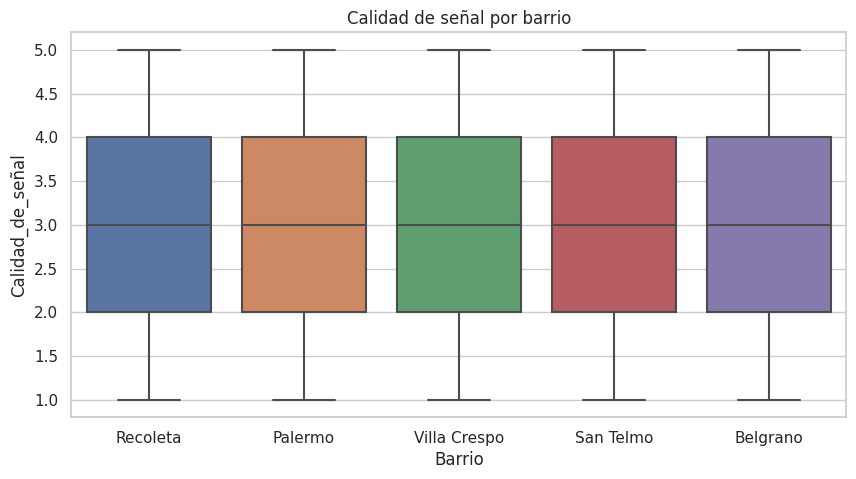

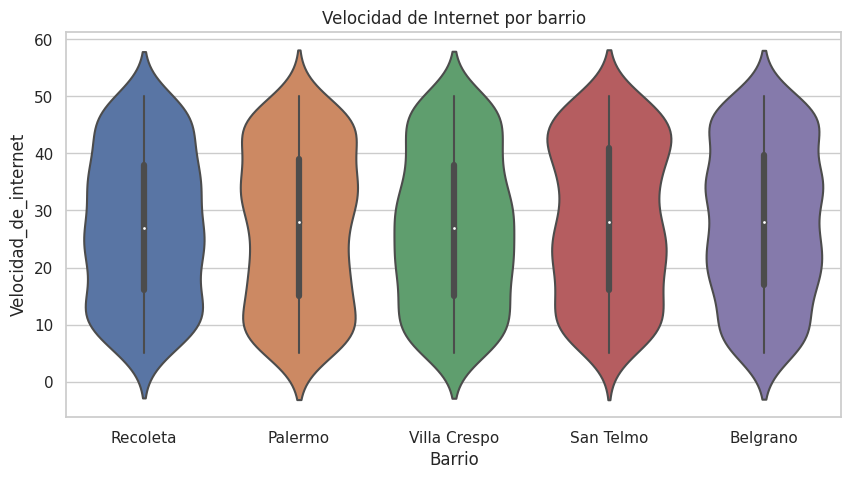

In [18]:
sns.set_theme(style="whitegrid")

# Boxplot de calidad de señal por barrio
plt.figure(figsize=(10, 5))
sns.boxplot(x="Barrio", y="Calidad_de_señal", data=df)
plt.title("Calidad de señal por barrio")
plt.show()

# Violinplot de velocidad de Internet por barrio
plt.figure(figsize=(10, 5))
sns.violinplot(x="Barrio", y="Velocidad_de_internet", data=df)
plt.title("Velocidad de Internet por barrio")
plt.show()

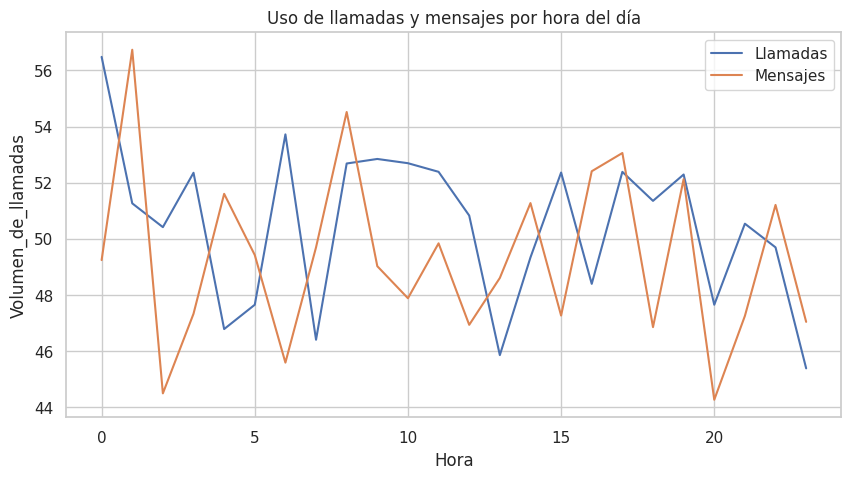

In [19]:
# Preparar los datos para el lineplot
df['Hora'] = df['Hora_del_día'].apply(lambda x: int(x.split(':')[0]))
grouped_data = df.groupby('Hora').agg({'Volumen_de_llamadas': 'mean', 'Volumen_de_mensajes': 'mean'}).reset_index()

# Lineplot de uso de llamadas y mensajes por hora del día
plt.figure(figsize=(10, 5))
sns.lineplot(x="Hora", y="Volumen_de_llamadas", data=grouped_data, label="Llamadas")
sns.lineplot(x="Hora", y="Volumen_de_mensajes", data=grouped_data, label="Mensajes")
plt.title("Uso de llamadas y mensajes por hora del día")
plt.legend()
plt.show()


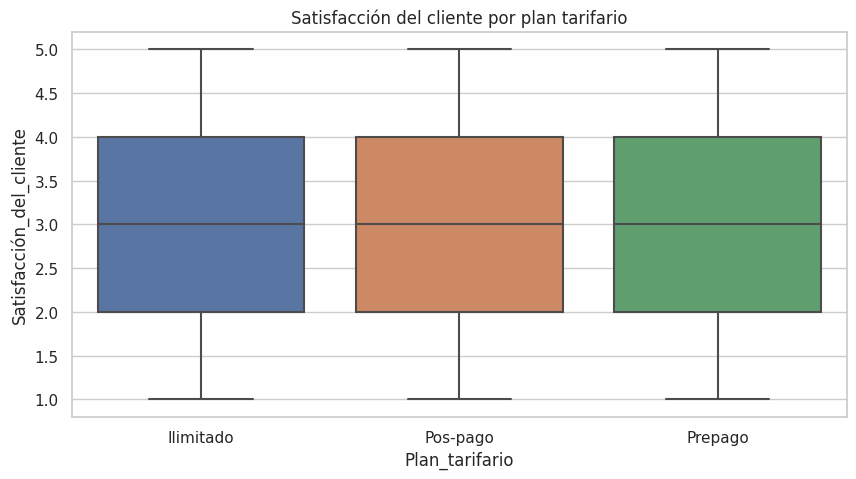

In [20]:
# Boxplot de satisfacción del cliente por plan tarifario
plt.figure(figsize=(10, 5))
sns.boxplot(x="Plan_tarifario", y="Satisfacción_del_cliente", data=df)
plt.title("Satisfacción del cliente por plan tarifario")
plt.show()


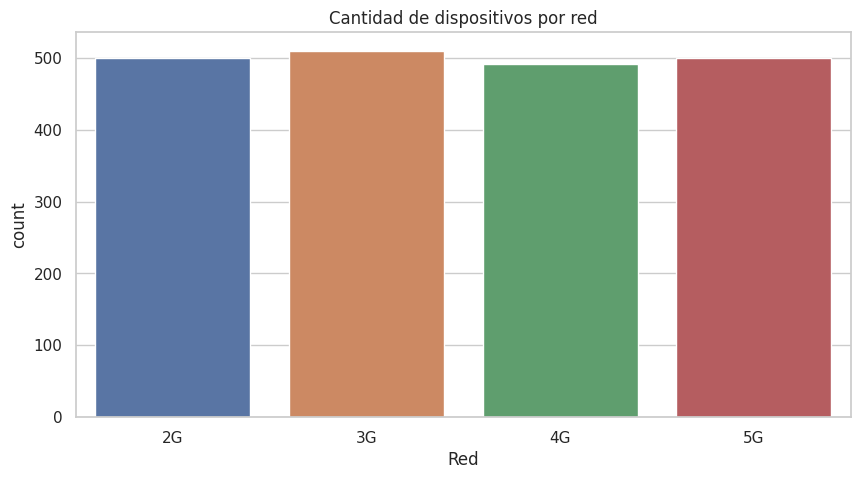

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Red", data=df, order=["2G", "3G", "4G", "5G"])
plt.title("Cantidad de dispositivos por red")
plt.show()


## **Modelos de machine learning**

In [22]:
# Convertir la hora del día en minutos desde la medianoche
df["Minutos_desde_la_medianoche"] = df["Hora_del_día"].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

# Eliminar la columna "Hora_del_día", ya que hemos creado una nueva columna numérica
df = df.drop("Hora_del_día", axis=1)

# Codificar las variables categóricas utilizando LabelEncoder
le = LabelEncoder()
categorical_columns = ["Barrio", "Tipo_de_dispositivo", "Red", "Sistema_operativo", "Plan_tarifario"]
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df.drop("Satisfacción_del_cliente", axis=1)
y = df["Satisfacción_del_cliente"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características utilizando MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar y evaluar el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Precisión:", accuracy_score(y_test, y_pred))

Reporte de clasificación:
               precision    recall  f1-score   support

           1       0.20      0.17      0.19        87
           2       0.22      0.21      0.22        84
           3       0.20      0.21      0.20        73
           4       0.23      0.22      0.22        82
           5       0.21      0.26      0.23        74

    accuracy                           0.21       400
   macro avg       0.21      0.21      0.21       400
weighted avg       0.21      0.21      0.21       400

Precisión: 0.2125


El reporte de clasificación muestra varias métricas de rendimiento del modelo para cada clase de satisfacción del cliente (1 a 5) y para el conjunto de datos en general. Las métricas incluyen precisión, recall y F1-score.

Precisión: Es la proporción de predicciones correctas entre todas las predicciones realizadas para una clase específica. Por ejemplo, para la clase 1, la precisión es de 0.28, lo que significa que el 28% de las veces que el modelo predice que un cliente tiene una satisfacción de 1, en realidad es correcto.

Recall (sensibilidad): Es la proporción de predicciones correctas entre todas las instancias reales de una clase específica. Por ejemplo, para la clase 1, el recall es de 0.23, lo que significa que el modelo identifica correctamente al 23% de los clientes con una satisfacción de 1.

F1-score: Es una medida que combina la precisión y el recall utilizando la media armónica. Un F1-score más alto indica un mejor equilibrio entre la precisión y el recall. En este caso, el F1-score para la clase 1 es de 0.25.

Además, el reporte proporciona promedios ponderados y no ponderados de estas métricas:

Macro avg: Calcula el promedio no ponderado de las métricas para cada clase. En este caso, el promedio macro de precisión, recall y F1-score es de 0.21.

Weighted avg: Calcula el promedio ponderado de las métricas para cada clase, tomando en cuenta la cantidad de instancias en cada clase. En este caso, el promedio ponderado de precisión, recall y F1-score es de 0.22.

Por último, el valor de "accuracy" (precisión) es una métrica general que indica la proporción de predicciones correctas en todo el conjunto de datos. En este caso, la precisión es de 0.21, lo que significa que el modelo hace predicciones correctas el 21% del tiempo. 

Es importante tener en cuenta que este resultado es bajo porque estoy trabajando con datos ficticios, para mejorar el rendimiento del modelo habria que utilizar datos reales.

## K-means 
Seleccionar el número de clusters, K, que deseamos encontrar en los datos.
Inicializar aleatoriamente K centroides en el espacio de características.
Asignar cada punto de datos al centroide más cercano.
Calcular el nuevo centroide de cada cluster como la media de todos los puntos asignados a ese cluster.
Repetir los pasos 3 y 4 hasta que los centroides no cambien significativamente o se alcance un número máximo de iteraciones.
Debido a la naturaleza aleatoria de los datos generados, los resultados pueden no tener un patrón claro en este caso

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


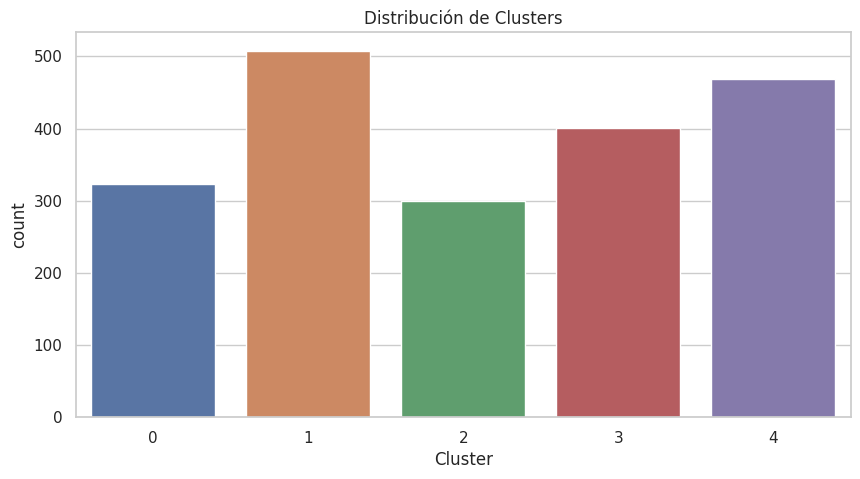

In [23]:
# Codificar las variables categóricas utilizando LabelEncoder
le = LabelEncoder()
categorical_columns = ["Barrio", "Tipo_de_dispositivo", "Red", "Sistema_operativo", "Plan_tarifario"]
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

# Eliminar la columna "Satisfacción_del_cliente", ya que no se utilizará en el clustering
df_cluster = df.drop("Satisfacción_del_cliente", axis=1)

# Escalar las características utilizando MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Aplicar el algoritmo K-means para el clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_scaled)

# Asignar las etiquetas de clusters a cada usuario
df["Cluster"] = kmeans.labels_

# Visualizar la distribución de los clusters
plt.figure(figsize=(10, 5))
sns.countplot(x="Cluster", data=df)
plt.title("Distribución de Clusters")
plt.show()

In [25]:
cluster_means = df.groupby("Cluster").mean()
relevant_columns = [
    "Calidad_de_señal",
    "Velocidad_de_internet",
    "Volumen_de_llamadas",
    "Volumen_de_mensajes",
    "Tiempo_medio_de_llamada",
    "Satisfacción_del_cliente",
]
cluster_means = df.groupby("Cluster")[relevant_columns].mean()
cluster_means


,Calidad_de_señal,Velocidad_de_internet,Volumen_de_llamadas,Volumen_de_mensajes,Tiempo_medio_de_llamada,Satisfacción_del_cliente
Cluster,,,,,,
0,3.120743,28.352941,50.696594,51.086687,29.222910,3.003096
1,3.025591,28.328740,52.413386,47.726378,30.173228,3.009843
2,2.966667,27.306667,50.000000,50.560000,29.493333,3.056667
3,2.922693,26.725686,50.062344,48.650873,30.728180,3.037406
4,3.019231,26.873932,48.683761,49.824786,31.549145,2.861111


Conclusiones finales:

Analizando la calidad de la señal y la velocidad de Internet se observa cómo se distribuyen estos valores entre los diferentes clusters y barrios. Si por algún motivo se encuentran áreas con un rendimiento consistentemente bajo, se podría sugerir que la empresa de telecomunicaciones investigue si hay problemas en la infraestructura de red en esas áreas y realice mejoras para garantizar una mejor experiencia al cliente.

En cuanto a la segmentación de usuarios: A partir del análisis de clustering, se identifican diferentes segmentos de usuarios según sus patrones de uso y necesidades. Por ejemplo, se ha encontrado un grupo de clientes que realiza muchas llamadas y envía muchos mensajes, y otro grupo que utiliza principalmente el servicio para navegar por Internet. La empresa de telecomunicaciones podría considerar ofrecer planes y promociones personalizadas para satisfacer mejor las necesidades de estos diferentes segmentos.

El análisis de satisfacción del cliente examina la relación entre la satisfacción del cliente y otras características, como la calidad de la señal, la velocidad de Internet y el volumen de uso. Si se encuentran correlaciones significativas, podría sugerir que la empresa se enfoque en mejorar esos aspectos para aumentar la satisfacción general de sus clientes.

Por último, la predicción de la satisfacción del cliente: El modelo de árbol de decisión podría utilizarse para predecir la satisfacción del cliente en función de las características de uso y del dispositivo. La empresa de telecomunicaciones podría emplear este modelo para identificar a los clientes que podrían estar insatisfechos y tomar medidas proactivas para abordar sus problemas y mejorar su experiencia, asi como ofrecer servicios que se adapten mejor a los requerimentos de cada grupo segmentado.